In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Load the datasets
nba_df = pd.read_csv('./datasets/nba_2008-2024.csv')
team_df = pd.read_csv('./datasets/team_summaries.csv')

In [54]:
# Check for missing values in nba_2008-2024.csv
missing_nba = nba_df.isnull().sum()
print("Missing values in nba_2008-2024.csv:")
print(missing_nba)

# Check for missing values in team_summaries.csv
missing_ts = team_df.isnull().sum()
print("\nMissing values in team_summaries.csv:")
print(missing_ts)

Missing values in nba_2008-2024.csv:
season               0
date                 0
regular              0
playoffs             0
away                 0
home                 0
score_away           0
score_home           0
q1_away              0
q2_away              0
q3_away              0
q4_away              0
ot_away              0
q1_home              0
q2_home              0
q3_home              0
q4_home              0
ot_home              0
whos_favored         4
spread               7
total                4
moneyline_away    1977
moneyline_home    1977
h2_spread         1975
h2_total          1980
id_spread            7
id_total             4
dtype: int64

Missing values in team_summaries.csv:
season                0
lg                    0
team                  0
abbreviation         87
playoffs              0
age                  64
w                    88
l                    88
pw                    1
pl                    1
mov                   1
sos                   1
sr

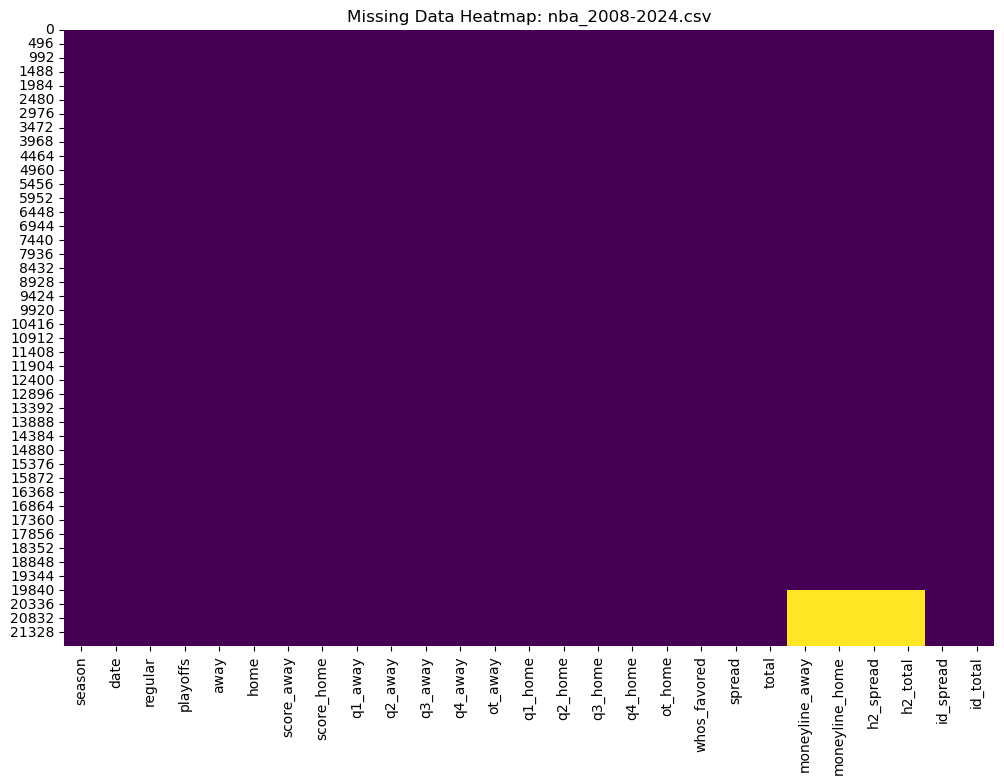

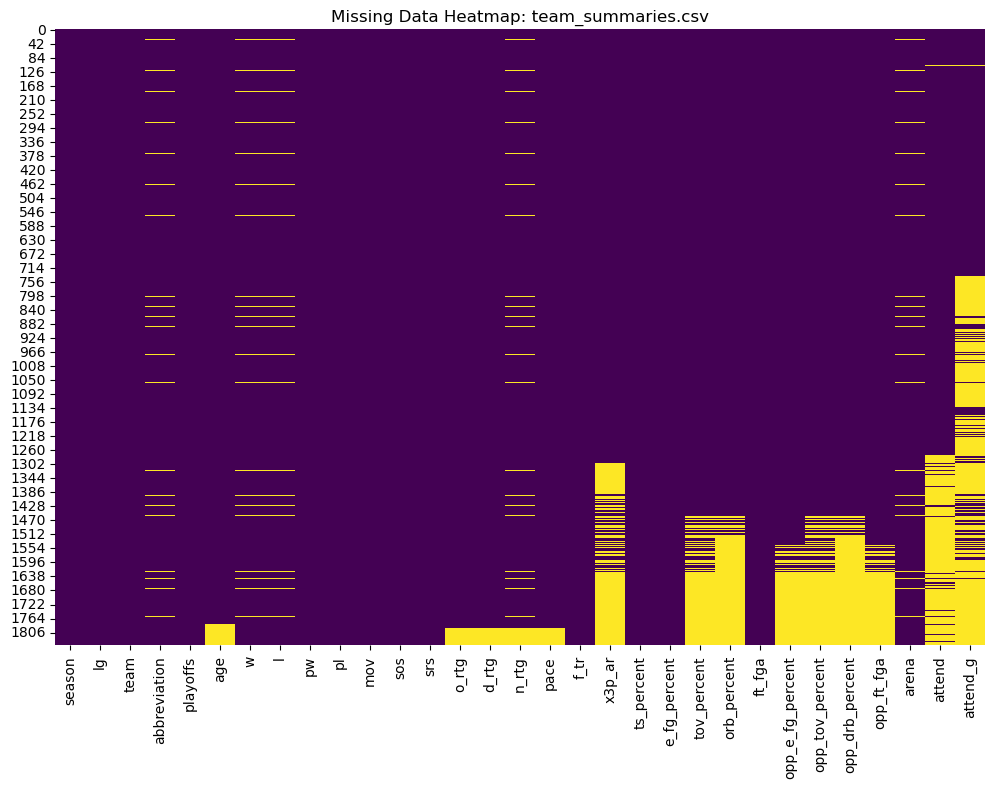

In [55]:
# Visualize missing data for nba_2008-2024.csv
plt.figure(figsize=(12, 8))
sns.heatmap(nba_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: nba_2008-2024.csv')
plt.show()

# Visualize missing data for team_summaries.csv
plt.figure(figsize=(12, 8))
sns.heatmap(team_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: team_summaries.csv')
plt.show()

In [56]:
# Remove rows with any missing values
nba_copy = nba_df.dropna().copy()
missing_data = nba_copy.isnull().sum()
print(missing_data)
nba_copy.shape

season            0
date              0
regular           0
playoffs          0
away              0
home              0
score_away        0
score_home        0
q1_away           0
q2_away           0
q3_away           0
q4_away           0
ot_away           0
q1_home           0
q2_home           0
q3_home           0
q4_home           0
ot_home           0
whos_favored      0
spread            0
total             0
moneyline_away    0
moneyline_home    0
h2_spread         0
h2_total          0
id_spread         0
id_total          0
dtype: int64


(19812, 27)

In [57]:
# Convert boolean values in 'regular' and 'playoffs' columns to integers (1 for True, 0 for False)
nba_copy['regular'] = nba_copy['regular'].map({True: 1, False: 0})
nba_copy['playoffs'] = nba_copy['playoffs'].map({True: 1, False: 0})

In [58]:
# Encode the 'whos_favored' column as binary values (1 for 'home', 0 for 'away')
nba_copy.loc[:, 'whos_favored_encoded'] = nba_copy['whos_favored'].apply(lambda x: 1 if x == 'home' else 0)
print(nba_copy)

       season        date  regular  playoffs  away home  score_away  \
0        2008  2007-10-30        1         0   por   sa          97   
1        2008  2007-10-30        1         0  utah   gs         117   
2        2008  2007-10-30        1         0   hou  lal          95   
3        2008  2007-10-31        1         0   phi  tor          97   
4        2008  2007-10-31        1         0   wsh  ind         110   
...       ...         ...      ...       ...   ...  ...         ...   
19817    2023  2023-01-16        1         0    gs  wsh         127   
19818    2023  2023-01-16        1         0   mia  atl         113   
19819    2023  2023-01-16        1         0  utah  min         126   
19820    2023  2023-01-16        1         0   phx  mem         106   
19821    2023  2023-01-16        1         0   hou  lal         132   

       score_home  q1_away  q2_away  ...  whos_favored  spread  total  \
0             106       26       23  ...          home    13.0  189.5   
1

In [59]:
team_copy = team_df.copy()

# Convert the 'playoffs' column to integer type
team_copy.loc[:, 'playoffs'] = nba_copy['playoffs'].astype(int)
print(team_copy)

      season   lg                     team abbreviation  playoffs   age     w  \
0       2024  NBA            Atlanta Hawks          ATL       0.0  26.2  36.0   
1       2024  NBA           Boston Celtics          BOS       0.0  28.2  64.0   
2       2024  NBA            Brooklyn Nets          BRK       0.0  26.1  32.0   
3       2024  NBA            Chicago Bulls          CHI       0.0  28.1  39.0   
4       2024  NBA        Charlotte Hornets          CHO       0.0  25.1  21.0   
...      ...  ...                      ...          ...       ...   ...   ...   
1840    1947  BAA  Providence Steamrollers          PRO       0.0   NaN  28.0   
1841    1947  BAA        St. Louis Bombers          STB       0.0   NaN  38.0   
1842    1947  BAA          Toronto Huskies          TRH       0.0   NaN  22.0   
1843    1947  BAA      Washington Capitols          WSC       0.0   NaN  49.0   
1844    1947  BAA           League Average          NaN       0.0   NaN   NaN   

         l    pw    pl  ...

In [60]:
# Save the processed DataFrames
nba_copy.to_csv('./datasets/processed_nba_2008-2024.csv', index=False)
team_copy.to_csv('./datasets/processed_team_summaries.csv', index=False)

In [61]:
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,whos_favored,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,home,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,home,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,away,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,home,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,away,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0


# Feature Engineering

### Adding a 'Winner' Column Based on Game Results
In this step, we'll create a new column called `winner` to indicate which team won the game. We'll assign `1` for a home team win and `0` for an away team win.


In [62]:
# Now `nba_copy['winner']` contains 'away' if the away team won, and 'home' if the home team won
nba_copy['winner'] = nba_copy.apply(lambda row: 'away' if row['score_away'] > row['score_home'] else 'home', axis=1)
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded,winner
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1,home
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1,away
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0,away
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1,home
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0,home


In [63]:
# Map 'home' to 1 and 'away' to 0
nba_copy['winner'] = nba_copy['winner'].map({'home': 1, 'away': 0})
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded,winner
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1,0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0,1


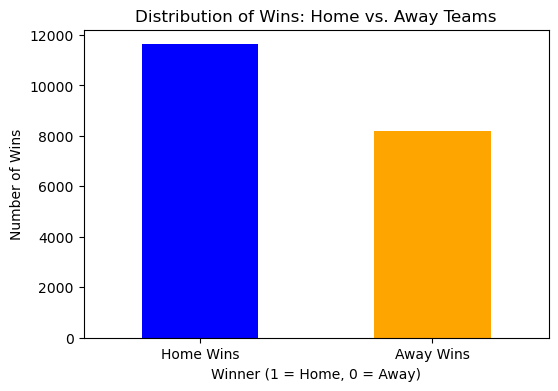

In [64]:
# Plot the distribution of wins
plt.figure(figsize=(6, 4))
nba_copy['winner'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Wins: Home vs. Away Teams')
plt.xlabel('Winner (1 = Home, 0 = Away)')
plt.ylabel('Number of Wins')
plt.xticks(ticks=[0, 1], labels=['Home Wins', 'Away Wins'], rotation=0)
plt.show()

## Point Differential

This code calculates the point differential (point_diff) for each game by subtracting the away team's score (score_away) from the home team's score (score_home). A positive value indicates a home team victory, while a negative value indicates an away team victory. This feature helps capture the margin of victory or loss in each game, providing insights into the strength of a team’s performance.

In [65]:
nba_copy['point_diff'] = nba_copy['score_home'] - nba_copy['score_away']
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total,whos_favored_encoded,winner,point_diff
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,189.5,900.0,-1400.0,5.0,95.0,0.0,1.0,1,1,9
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,212.0,100.0,-120.0,3.0,105.5,0.0,1.0,1,0,-21
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,199.0,-230.0,190.0,3.0,99.0,0.0,0.0,0,0,-2
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,191.0,255.0,-305.0,2.0,96.5,1.0,1.0,1,1,9
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,203.5,-125.0,105.0,1.0,105.0,0.0,1.0,0,1,9


KeyboardInterrupt: 

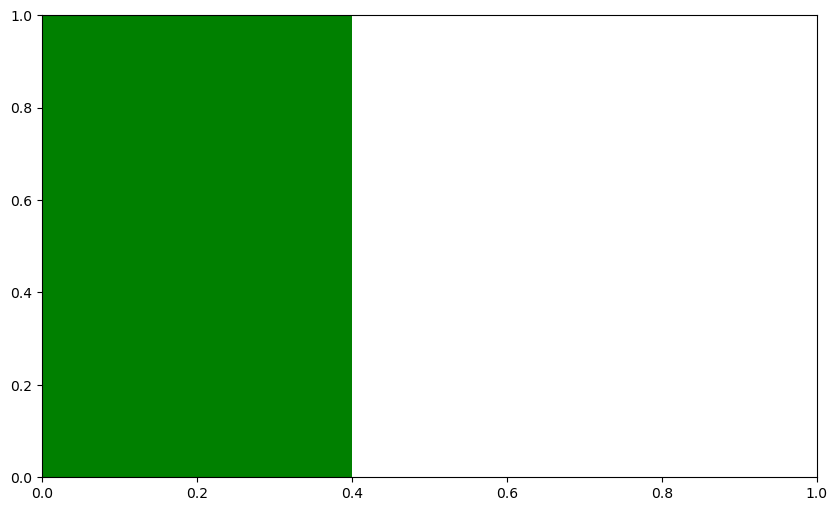

In [66]:
# Plotting the point differential
plt.figure(figsize=(10, 6))
plt.bar(nba_copy.index, nba_copy['point_diff'], color=['green' if x > 0 else 'red' for x in nba_copy['point_diff']])
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Point Differential per Game')
plt.xlabel('Game Index')
plt.ylabel('Point Differential (Home - Away)')
plt.xticks(nba_copy.index)
plt.show()

## Quarter Score Differences

These line of codes create features representing the score differences for each quarter (`q1_diff`, `q2_diff`, `q3_diff`, `q4_diff`) and overtime (ot_diff). Each difference is calculated by subtracting the away team’s score from the home team’s score in the respective periods. These features can help analyze which team tends to perform better at different stages of the game, indicating momentum or consistency in performance.

In [ ]:
nba_copy['q1_diff'] = nba_copy['q1_home'] - nba_copy['q1_away']
nba_copy['q2_diff'] = nba_copy['q2_home'] - nba_copy['q2_away']
nba_copy['q3_diff'] = nba_copy['q3_home'] - nba_copy['q3_away']
nba_copy['q4_diff'] = nba_copy['q4_home'] - nba_copy['q4_away']
nba_copy['ot_diff'] = nba_copy['ot_home'] - nba_copy['ot_away']
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,id_spread,id_total,whos_favored_encoded,winner,point_diff,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,0.0,1.0,1,1,9,3,7,-6,5,0
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,0.0,1.0,1,0,-21,2,-13,-3,-7,0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,0.0,0.0,0,0,-2,9,-9,-8,6,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,1.0,1.0,1,1,9,2,6,6,-5,0
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,0.0,1.0,0,1,9,5,-2,-3,0,9


## Total Points Scored

This code calculates the total points scored (`total_points`) in each game by summing the scores of both the home and away teams. This feature provides an overall scoring pattern for each game, which can be used to analyze whether games generally go over or under the predicted totals (`total`).

In [ ]:
nba_copy['total_points'] = nba_copy['score_home'] + nba_copy['score_away']
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,id_total,whos_favored_encoded,winner,point_diff,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff,total_points
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,1.0,1,1,9,3,7,-6,5,0,203
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1.0,1,0,-21,2,-13,-3,-7,0,213
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,0.0,0,0,-2,9,-9,-8,6,0,188
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,1.0,1,1,9,2,6,6,-5,0,203
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1.0,0,1,9,5,-2,-3,0,9,229


## Moneyline Difference

The `moneyline_diff` column is calculated by subtracting the away team’s moneyline odds (`moneyline_away`) from the home team’s moneyline odds (`moneyline_home`). This feature provides insight into the relative confidence of bettors in the home team versus the away team, with larger differences potentially indicating stronger expected performance by the favored team.

In [ ]:
nba_copy['moneyline_diff'] = nba_copy['moneyline_home'] - nba_copy['moneyline_away']
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,whos_favored_encoded,winner,point_diff,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,1,1,9,3,7,-6,5,0,203,-2300.0
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,1,0,-21,2,-13,-3,-7,0,213,-220.0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,0,0,-2,9,-9,-8,6,0,188,420.0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,1,1,9,2,6,6,-5,0,203,-560.0
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,0,1,9,5,-2,-3,0,9,229,230.0


## Spread-Margin Interaction

This feature (`spread_margin_diff`) measures the difference between the point spread (`spread`) and the actual point differential (`point_diff`). The absolute value of this difference indicates how well the spread prediction matched the actual game outcome. If a team consistently wins by more or less than the spread, it might suggest that the model should adjust its expectations for that team.

In [ ]:
import numpy as np

nba_copy['spread_margin_diff'] = np.abs(nba_copy['spread'] - nba_copy['point_diff'])
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,winner,point_diff,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff,spread_margin_diff
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,1,9,3,7,-6,5,0,203,-2300.0,4.0
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,0,-21,2,-13,-3,-7,0,213,-220.0,22.0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,0,-2,9,-9,-8,6,0,188,420.0,7.0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,1,9,2,6,6,-5,0,203,-560.0,2.5
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,1,9,5,-2,-3,0,9,229,230.0,7.5


## Favorite vs. Outcome Indicator

This code creates the `favored_win` feature by comparing the `whos_favored` column with the `winner` column. The winner column indicates which team won the game (1 for a home team win, 0 for an away team win). The `favored_win` column is set to 1 if the favored team (as indicated in `whos_favored`) won the game and 0 otherwise. This feature helps assess the accuracy of betting predictions and can enhance the model's ability to predict game outcomes based on favoritism.

In [ ]:
nba_copy['favored_win'] = np.where(
    (nba_copy['whos_favored'] == 'home') & (nba_copy['winner'] == 1) |
    (nba_copy['whos_favored'] == 'away') & (nba_copy['winner'] == 0),
    1, 0
)
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,point_diff,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff,spread_margin_diff,favored_win
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,9,3,7,-6,5,0,203,-2300.0,4.0,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,-21,2,-13,-3,-7,0,213,-220.0,22.0,0
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,-2,9,-9,-8,6,0,188,420.0,7.0,1
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,9,2,6,6,-5,0,203,-560.0,2.5,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,9,5,-2,-3,0,9,229,230.0,7.5,0


## Over/Under Outcome

The `over_under_result` feature is a binary indicator that equals 1 if the total points scored in the game (`total_points`) exceeded the predicted total (`total`) and 0 otherwise. This feature helps analyze the accuracy of over/under predictions and can be useful in predicting future game totals.

In [ ]:
nba_copy['over_under_result'] = (nba_copy['total_points'] > nba_copy['total']).astype(int)
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,q1_diff,q2_diff,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff,spread_margin_diff,favored_win,over_under_result
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,3,7,-6,5,0,203,-2300.0,4.0,1,1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,2,-13,-3,-7,0,213,-220.0,22.0,0,1
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,9,-9,-8,6,0,188,420.0,7.0,1,0
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,2,6,6,-5,0,203,-560.0,2.5,1,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,5,-2,-3,0,9,229,230.0,7.5,0,1


## Second Half Scoring Impact

This feature (`second_half_diff`) calculates the scoring differential in the second half of the game, including overtime, by subtracting the away team’s second-half and overtime points from the home team’s. It captures how much the scoring differential changes in the latter part of the game, which can be useful for predicting outcomes in games where momentum shifts in the second half.

In [ ]:
nba_copy['second_half_diff'] = (nba_copy['q3_home'] + nba_copy['q4_home'] + nba_copy['ot_home']) - \
                               (nba_copy['q3_away'] + nba_copy['q4_away'] + nba_copy['ot_away'])
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,q2_diff,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff,spread_margin_diff,favored_win,over_under_result,second_half_diff
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,7,-6,5,0,203,-2300.0,4.0,1,1,-1
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,-13,-3,-7,0,213,-220.0,22.0,0,1,-10
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,-9,-8,6,0,188,420.0,7.0,1,0,-2
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6,6,-5,0,203,-560.0,2.5,1,1,1
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,-2,-3,0,9,229,230.0,7.5,0,1,6


## Adjusted Spread

The `adjusted_spread` feature combines the point spread (`spread`) with the moneyline difference (`moneyline_diff`), adjusted by dividing the moneyline difference by 100. This feature aims to provide a more nuanced measure of the expected margin of victory by accounting for both the spread and the confidence implied by moneyline odds.

In [ ]:
nba_copy['adjusted_spread'] = nba_copy['spread'] + nba_copy['moneyline_diff'] / 100
nba_copy.head()

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,q3_diff,q4_diff,ot_diff,total_points,moneyline_diff,spread_margin_diff,favored_win,over_under_result,second_half_diff,adjusted_spread
0,2008,2007-10-30,1,0,por,sa,97,106,26,23,...,-6,5,0,203,-2300.0,4.0,1,1,-1,-10.0
1,2008,2007-10-30,1,0,utah,gs,117,96,28,34,...,-3,-7,0,213,-220.0,22.0,0,1,-10,-1.2
2,2008,2007-10-30,1,0,hou,lal,95,93,16,27,...,-8,6,0,188,420.0,7.0,1,0,-2,9.2
3,2008,2007-10-31,1,0,phi,tor,97,106,22,28,...,6,-5,0,203,-560.0,2.5,1,1,1,0.9
4,2008,2007-10-31,1,0,wsh,ind,110,119,23,22,...,-3,0,9,229,230.0,7.5,0,1,6,3.8
